# ATP Tennis Data - Player Diff Stats + One Hot Encoding (Player ID Only)


In our previous [notebook](https://github.com/sv650s/sb-capstone2/blob/master/notebooks/5-atp_sklearn_classifier.ipynb), we saw the best performance for the palyer diff dataset with Decision Tree Classifier

In this notebook, we will run the same model with a slightly modified dataset. Instead of have player 1 and player 2 id's as features, we have one hot encoded these as features. All other categorical data has not been one hot encoded yet (ie, tournament id, surface)


### Results from Decision Tree Classifier with player diff dataset:

```
Model Score: 0.9222207231516459

              precision    recall  f1-score   support

        Loss       0.92      0.92      0.92      7378
         Win       0.92      0.93      0.92      7446

    accuracy                           0.92     14824
   macro avg       0.92      0.92      0.92     14824
weighted avg       0.92      0.92      0.92     14824
```

# Summary of Results

Decison Tree is still our best algorithm with accuracy of around 93%.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff-ohe_player"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-{DESCRIPTION}.csv'

START_YEAR = 1998
END_YEAR = 2019

MODEL_TEMPLATE_NAME = f'{START_YEAR}-{END_YEAR}-{DESCRIPTION}.pkl'

LABEL_COL = 'p1_winner'

# random seed
RSTATE = 1
N_JOBS = 4
MAX_ITER = 100



ModelWrapper.init(description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR, 
                 model_file_format = MODEL_TEMPLATE_NAME)

In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR)

# Logistic Regression

In [3]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_lr = lr.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6736373448461953

              precision    recall  f1-score   support

        Loss       0.67      0.67      0.67      7378
         Win       0.67      0.68      0.68      7446

    accuracy                           0.67     14824
   macro avg       0.67      0.67      0.67     14824
weighted avg       0.67      0.67      0.67     14824

      Loss   Win
Loss  4911  2467
Win   2371  5075


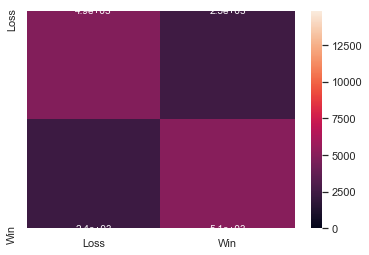

In [4]:
lr.analyze()

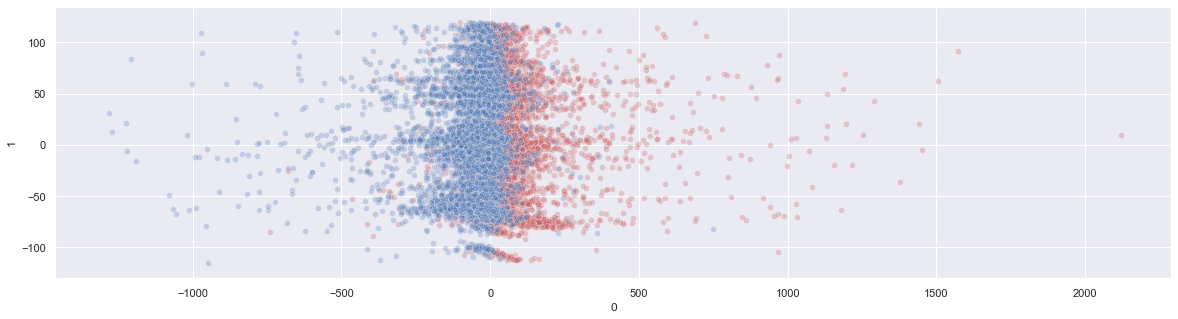

In [5]:
ju.plot_2d(X_test, y_predict_lr)

In [6]:
lr.save()

# KNN

In [7]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.789260658391797

              precision    recall  f1-score   support

        Loss       0.77      0.82      0.79      7378
         Win       0.81      0.76      0.78      7446

    accuracy                           0.79     14824
   macro avg       0.79      0.79      0.79     14824
weighted avg       0.79      0.79      0.79     14824

      Loss   Win
Loss  6049  1329
Win   1795  5651


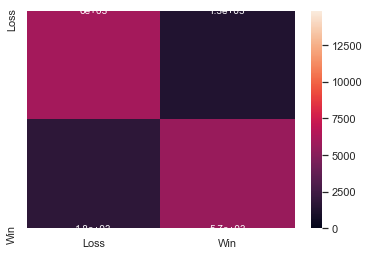

In [8]:
knn.analyze()

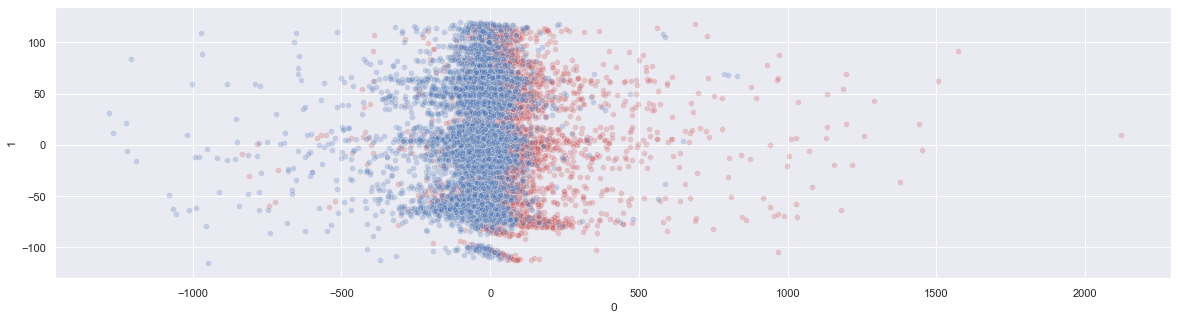

In [9]:
ju.plot_2d(X_test, y_predict_knn)

In [10]:
knn.save()

# Decision Tree

In [11]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.9372638963842418

              precision    recall  f1-score   support

        Loss       0.93      0.94      0.94      7378
         Win       0.94      0.93      0.94      7446

    accuracy                           0.94     14824
   macro avg       0.94      0.94      0.94     14824
weighted avg       0.94      0.94      0.94     14824

      Loss   Win
Loss  6940   438
Win    492  6954


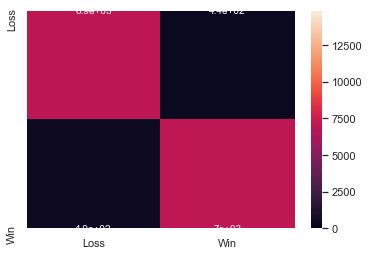

In [12]:
dt.analyze()

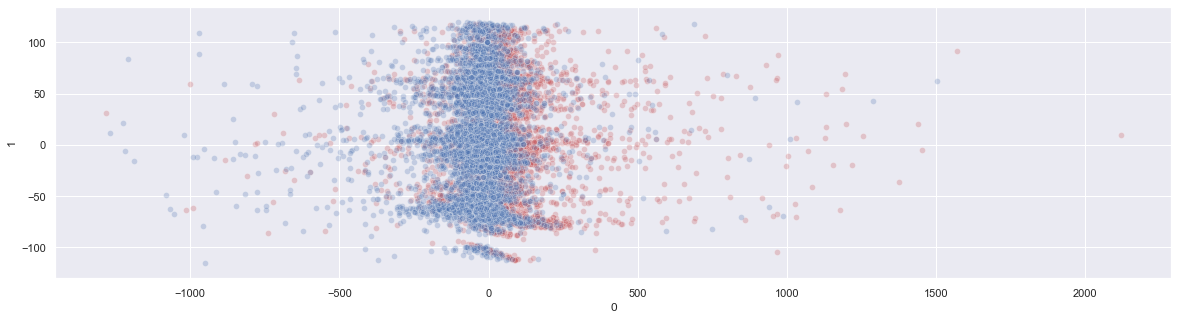

In [13]:
ju.plot_2d(X_test, y_predict_dt)

In [14]:
dt.save()

# Random Forest Classifier

In [15]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_rf = rf.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.7974905558553697

              precision    recall  f1-score   support

        Loss       0.77      0.84      0.81      7378
         Win       0.83      0.75      0.79      7446

    accuracy                           0.80     14824
   macro avg       0.80      0.80      0.80     14824
weighted avg       0.80      0.80      0.80     14824

      Loss   Win
Loss  6224  1154
Win   1848  5598


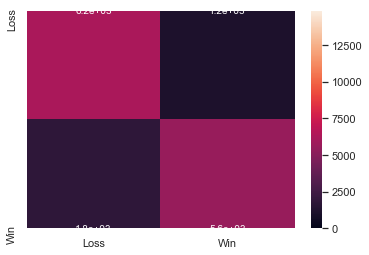

In [16]:
rf.analyze()

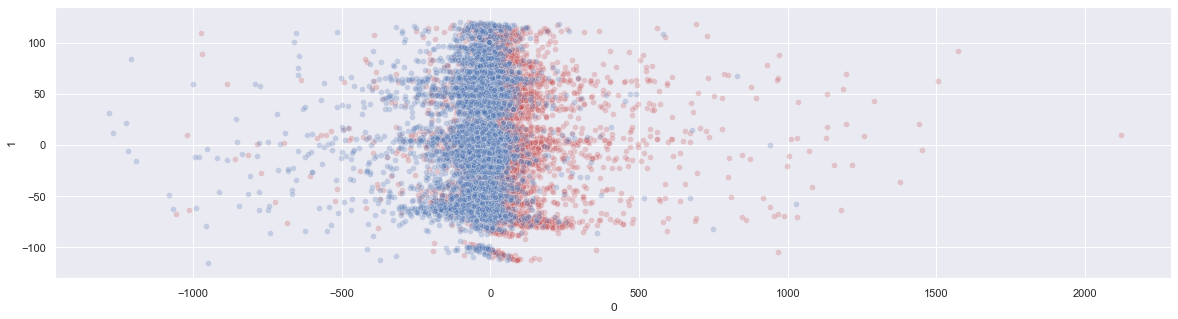

In [17]:
ju.plot_2d(X_test, y_predict_rf)

In [18]:
rf.save()

# Gradient Boosting

In [19]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3153            8.38m
         2           1.2572            8.27m
         3           1.2087            8.13m
         4           1.1699            8.03m
         5           1.1376            7.94m
         6           1.1111            7.84m
         7           1.0795            7.75m
         8           1.0528            7.66m
         9           1.0318            7.58m
        10           1.0104            7.51m
        20           0.8858            6.71m
        30           0.8207            5.83m
        40           0.7857            4.97m
        50           0.7662            4.13m
        60           0.7446            3.35m
        70           0.7142            2.51m
        80           0.6943            1.67m
        90           0.6787           50.03s
       100           0.6657            0.00s


Model Score: 0.8591473286562331

              precision    recall  f1-score   support

        Loss       0.84      0.88      0.86      7378
         Win       0.88      0.84      0.86      7446

    accuracy                           0.86     14824
   macro avg       0.86      0.86      0.86     14824
weighted avg       0.86      0.86      0.86     14824

      Loss   Win
Loss  6517   861
Win   1227  6219


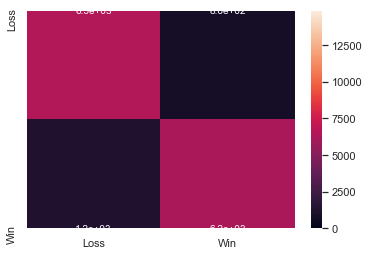

In [20]:
gb.analyze()

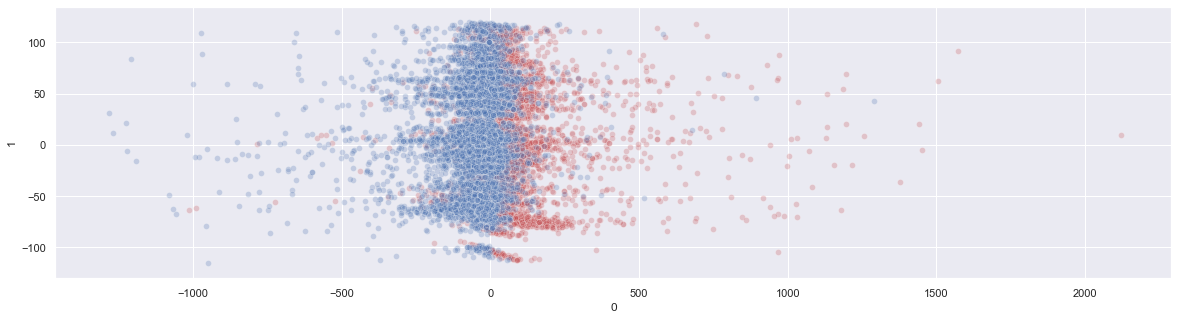

In [21]:
ju.plot_2d(X_test, y_predict_gb)

In [22]:
gb.save()

# AdaBoost

In [23]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.7574203993524015

              precision    recall  f1-score   support

        Loss       0.74      0.79      0.76      7378
         Win       0.78      0.73      0.75      7446

    accuracy                           0.76     14824
   macro avg       0.76      0.76      0.76     14824
weighted avg       0.76      0.76      0.76     14824

      Loss   Win
Loss  5805  1573
Win   2023  5423


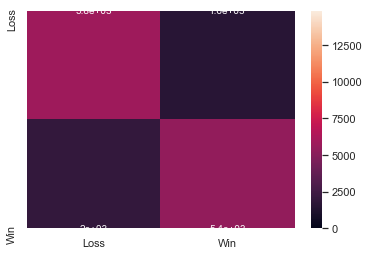

In [24]:
ab.analyze()

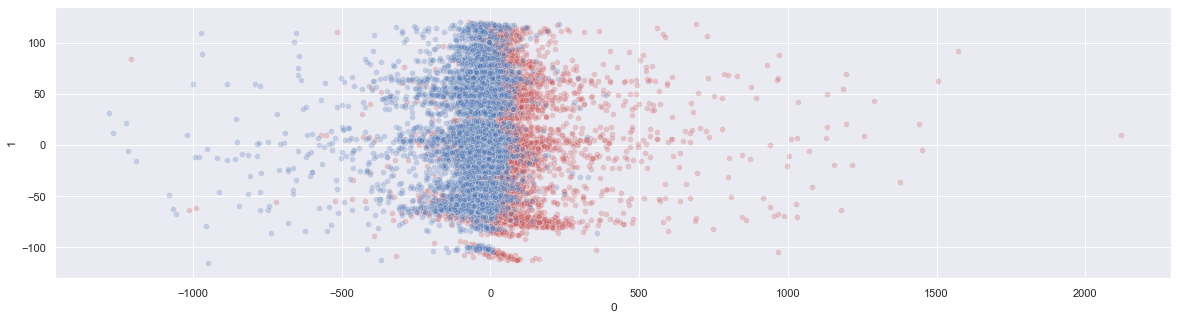

In [25]:
ju.plot_2d(X_test, y_predict_ab)

In [26]:
ab.save()

# Results

* Decision Tree is still performing the best and encoding player id's improved performance by 1%
* KNN actually saw the best improvement when with the new feature
* Logistic Regression, Grandient Boosting, and Random forest did slightly worse with the new features

In [6]:
report = pd.read_csv(ModelWrapper.report_file)

Text(0.5, 1.0, 'Model Accuracy')

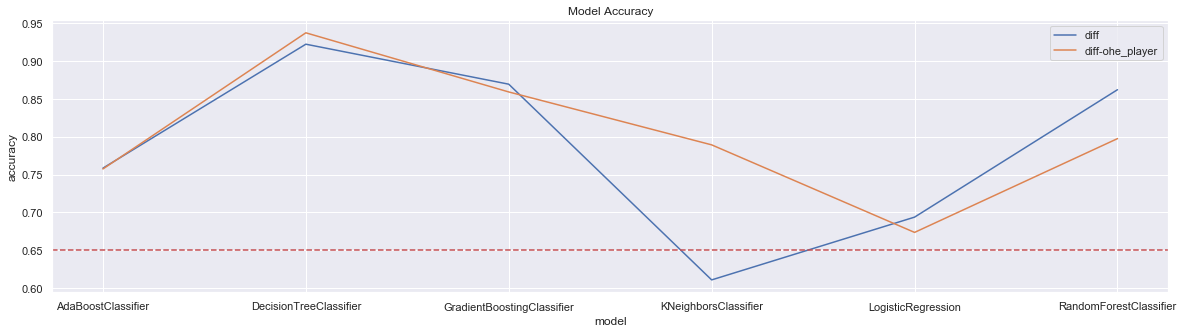

In [7]:
f, a = plt.subplots(1, 1, figsize=(20, 5))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    sns.lineplot(x="model", y="accuracy", data=report_desc, label=desc)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")